In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [2]:
disa_cate_df = pd.read_csv("disaster_categories.csv")
disa_msg_df = pd.read_csv("disaster_messages.csv")

In [3]:
disa_cate_df.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


In [4]:
disa_msg_df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [5]:
merge_df = disa_cate_df.merge(disa_msg_df)

In [6]:
categories_df = merge_df.categories.str.split(";",expand=True)
category_names = [x.split("-")[0] for x in categories_df.head(1).values.squeeze().tolist()]
categories_df.columns = category_names
categories_df = categories_df.applymap(lambda x : int(x.split("-")[-1]))

In [7]:
df = pd.concat([merge_df,categories_df],axis=1).drop("categories",axis=1)
df = df.drop_duplicates()

In [8]:
df.genre.value_counts()

news      13054
direct    10766
social     2396
Name: genre, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26216 entries, 0 to 26385
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      26216 non-null  int64 
 1   message                 26216 non-null  object
 2   original                10170 non-null  object
 3   genre                   26216 non-null  object
 4   related                 26216 non-null  int64 
 5   request                 26216 non-null  int64 
 6   offer                   26216 non-null  int64 
 7   aid_related             26216 non-null  int64 
 8   medical_help            26216 non-null  int64 
 9   medical_products        26216 non-null  int64 
 10  search_and_rescue       26216 non-null  int64 
 11  security                26216 non-null  int64 
 12  military                26216 non-null  int64 
 13  child_alone             26216 non-null  int64 
 14  water                   26216 non-null  int64 
 15  fo

In [55]:
df.isna().sum()

id                            0
message                       0
original                  16046
genre                         0
related                       0
request                       0
offer                         0
aid_related                   0
medical_help                  0
medical_products              0
search_and_rescue             0
security                      0
military                      0
child_alone                   0
water                         0
food                          0
shelter                       0
clothing                      0
money                         0
missing_people                0
refugees                      0
death                         0
other_aid                     0
infrastructure_related        0
transport                     0
buildings                     0
electricity                   0
tools                         0
hospitals                     0
shops                         0
aid_centers                   0
other_in

In [62]:
db_name = "disaster_response_detector.db"
table_name = "disaster_messages"
engine = create_engine(f"sqlite:///{db_name}")

In [63]:
df.to_sql(table_name, engine, index=False,if_exists='replace' )

<AxesSubplot:>

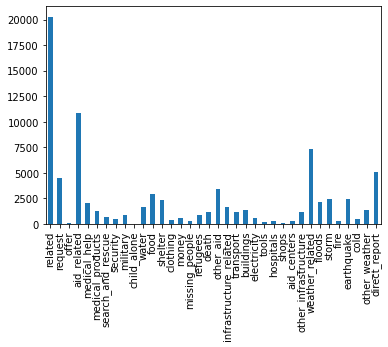

In [19]:
df[df.columns[4:]].sum().plot(kind="bar")

In [ ]:
z